In [1]:
from numpy import *
import operator

In [2]:
def createDataSet():
    group = array([[1.0, 1.1], [1.0, 1.0], [0.0, 0.0], [0.0, 0.1]])
    labels = ['A', 'A', 'B', 'B']
    return group, labels

In [3]:
group , labels = createDataSet()
print(tile([0,0],(group.shape[0],1))),print(tile([0,0],(1,4))),print(labels)

[[0 0]
 [0 0]
 [0 0]
 [0 0]]
[[0 0 0 0 0 0 0 0]]
['A', 'A', 'B', 'B']


(None, None, None)

In [4]:
def classify0(inX,dataset,labels,k):
    # 计算距离
    dataSetSize = dataset.shape[0]
    diffMat = tile(inX,(dataSetSize,1)) - dataset
    sqDiffMat = diffMat**2
    sqDistances = sqDiffMat.sum(axis=1)
    distances = sqDistances**0.5
    
    # 选择距离最小的k个点
    sortedDistIndicies = distances.argsort()
    classCount = {}
    for i in range(k):
        # 选择距离最小的k个点
        voteIlabel = labels[sortedDistIndicies[i]]
        # 统计k个点中各个标签的数量
        classCount[voteIlabel] = classCount.get(voteIlabel,0) + 1
    # 排序
    sortedClassCount = sorted(classCount.items(),key=operator.itemgetter(1),reverse=True)
    # 返回数量最多的标签
    return sortedClassCount[0][0]

In [5]:
def file2matrix(filename):
    fr = open(filename)
    arrayOLines = fr.readlines()
    numberOfLines = len(arrayOLines)
    # 创建返回的numpy矩阵
    returnMat = zeros((numberOfLines,3))
    classLabelVector = []
    index = 0
    for line in arrayOLines:
        # 去掉首尾空格
        line = line.strip()
        # 以\t分割
        listFromLine = line.split('\t')
        # 每列的属性数据
        returnMat[index,:] = listFromLine[0:3]
        # 每列的标签数据
        classLabelVector.append(int(listFromLine[-1]))
        index += 1
    return returnMat,classLabelVector

In [7]:
datingDataMat,datingLabels = file2matrix('machinelearninginaction/Ch02/datingTestSet2.txt')

In [8]:
datingDataMat

array([[4.0920000e+04, 8.3269760e+00, 9.5395200e-01],
       [1.4488000e+04, 7.1534690e+00, 1.6739040e+00],
       [2.6052000e+04, 1.4418710e+00, 8.0512400e-01],
       ...,
       [2.6575000e+04, 1.0650102e+01, 8.6662700e-01],
       [4.8111000e+04, 9.1345280e+00, 7.2804500e-01],
       [4.3757000e+04, 7.8826010e+00, 1.3324460e+00]])

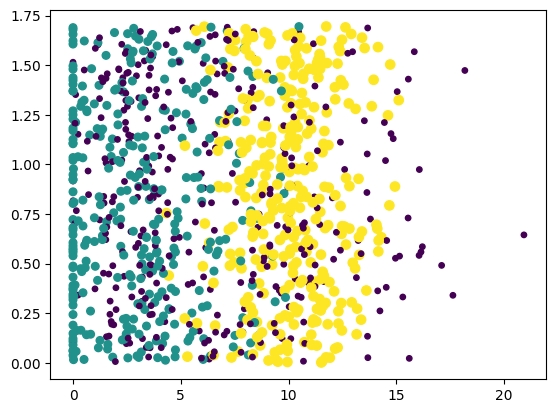

In [12]:
import matplotlib
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(datingDataMat[:,1],datingDataMat[:,2],15.0*array(datingLabels),15.0*array(datingLabels))
plt.show()


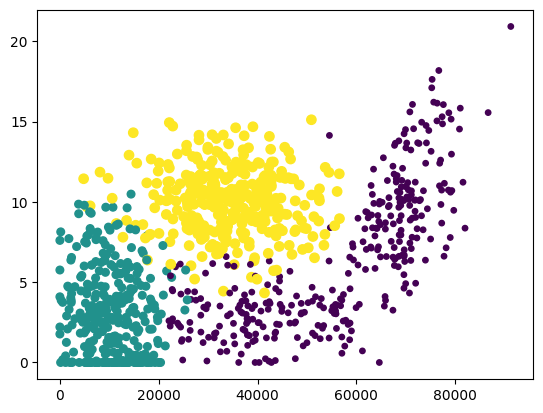

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(datingDataMat[:,0],datingDataMat[:,1],15.0*array(datingLabels),15.0*array(datingLabels))
plt.show()

In [14]:
def autoNorm(dataSet):
    # 每列的最小值
    minVals = dataSet.min(0)
    # 每列的最大值
    maxVals = dataSet.max(0)
    # 每列的范围
    ranges = maxVals - minVals
    # 创建返回的numpy矩阵
    normDataSet = zeros(shape(dataSet))
    # 行数
    m = dataSet.shape[0]
    # 生成范围内的随机数
    normDataSet = dataSet - tile(minVals,(m,1))
    normDataSet = normDataSet/tile(ranges,(m,1))
    return normDataSet,ranges,minVals

In [15]:
normMat,ranges,minVals = autoNorm(datingDataMat)

In [16]:
def datingClassTest():
    hoRatio = 0.10
    # 读取数据
    datingDataMat,datingLabels = file2matrix('machinelearninginaction/Ch02/datingTestSet2.txt')
    # 归一化
    normMat,ranges,minVals = autoNorm(datingDataMat)
    # 数据总数
    m = normMat.shape[0]
    # 测试数据数量
    numTestVecs = int(m*hoRatio)
    # 错误数量
    errorCount = 0.0
    for i in range(numTestVecs):
        # kNN分类
        classifierResult = classify0(normMat[i,:],normMat[numTestVecs:m,:],datingLabels[numTestVecs:m],3)
        # 打印分类结果和真实结果
        print("the classifier came back with: %d, the real answer is: %d" % (classifierResult,datingLabels[i]))
        # 判断是否错误
        if(classifierResult != datingLabels[i]):
            errorCount += 1.0
    # 打印错误率
    print("the total error rate is: %f" % (errorCount/float(numTestVecs)))

In [17]:
datingClassTest()

the classifier came back with: 3, the real answer is: 3
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answe

In [18]:
def classifyPerson():
    resultList = ['not at all','in small doses','in large doses']
    # 读取数据
    datingDataMat,datingLabels = file2matrix('machinelearninginaction/Ch02/datingTestSet2.txt')
    # 归一化
    normMat,ranges,minVals = autoNorm(datingDataMat)
    # 输入数据
    ffMiles = float(input("frequent flier miles earned per year?"))
    percentTats = float(input("percentage of time spent playing video games?"))
    iceCream = float(input("liters of ice cream consumed per year?"))
    # kNN分类
    classifierResult = classify0(array([ffMiles,percentTats,iceCream]),normMat,datingLabels,3)
    # 打印分类结果
    print("You will probably like this person: ",resultList[classifierResult - 1])

In [20]:
classifyPerson()

You will probably like this person:  not at all


## 实例 手写识别系统

In [24]:
def img2vector(filename):
    returnVect = zeros((1,1024))
    fr = open(filename)
    for i in range(32):
        # 读取一行数据
        lineStr = fr.readline()
        for j in range(32):
            # 将每行的前32个字符值存储在numpy数组中
            returnVect[0,32*i+j] = int(lineStr[j])
    return returnVect

In [21]:
from os import listdir


In [25]:
def handwritingClassTest():
    hwLabels = []
    # 获取目录内容
    trainingFileList = listdir('machinelearninginaction/Ch02/digits/trainingDigits')
    m = len(trainingFileList)
    # 创建返回的numpy矩阵
    trainingMat = zeros((m,1024))
    for i in range(m):
        # 从文件名解析分类数字
        fileNameStr = trainingFileList[i]
        fileStr = fileNameStr.split('.')[0]
        classNumStr = int(fileStr.split('_')[0])
        # 存储分类
        hwLabels.append(classNumStr)
        # 读取数据
        trainingMat[i,:] = img2vector('machinelearninginaction/Ch02/digits/trainingDigits/%s' % fileNameStr)
    # 获取目录内容
    testFileList = listdir('machinelearninginaction/Ch02/digits/testDigits')
    errorCount = 0.0
    mTest = len(testFileList)
    for i in range(mTest):
        # 从文件名解析分类数字
        fileNameStr = testFileList[i]
        fileStr = fileNameStr.split('.')[0]
        classNumStr = int(fileStr.split('_')[0])
        # 读取数据
        vectorUnderTest = img2vector('machinelearninginaction/Ch02/digits/testDigits/%s' % fileNameStr)
        # kNN分类
        classifierResult = classify0(vectorUnderTest,trainingMat,hwLabels,3)
        # 打印分类结果和真实结果
        print("the classifier came back with: %d, the real answer is: %d" % (classifierResult,classNumStr))
        # 判断是否错误
        if(classifierResult != classNumStr):
            errorCount += 1.0
    # 打印错误率
    print("the total number of errors is: %d" % errorCount)
    print("the total error rate is: %f" % (errorCount/float(mTest)))

In [26]:
handwritingClassTest()

the classifier came back with: 4, the real answer is: 4
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 6, the real answe